# The Controversy of NHST
In the previous part of this lesson, we explored the final element of the NHST machinery and came to a rather uncomfortable conclusion: the modern incarnation of NHST is actually an inconsistent mixture of two different philosophies of inference that were never designed to go together. Of course, this has not stopped researchers from calculating $p$-values, declaring significance and rejecting null hypotheses for many years. This can be justified on purely pragmatic grounds, especially as the practical conclusions from the two approach are often similar. However, this pragramtic argument implies that, as long as you put these differences aside, NHST is a meaningful and useful procedure. Unfortunately, there are several reasons why this claim appears doubtful. In this final part of the lesson, we will explore a number of key problems with NHST that raise doubts about whether the method can even be considered useful on pragmatic grounds. 

## Problems with NHST
We will start by examining some of the core issues with the practical application of NHST. Some of these issues are specifically with what NHST is doing, whereas others are issues with what researchers *think* NHST is doing. Although *misunderstanding* NHST may seem an unfair critique (after all, this is not the method's fault), these issues are so widespread that they *are* a problem with the application of NHST in practice. Indeed, such misunderstandings are sometimes illuminating because they indicate what researchers *want* NHST to tell them, even if it does not. If our main tool for inference is *unintuitive* and does not tell us what we want, is it really the best tool?  

### 1. NHST is Not Answering the Right Question
Perhaps the most fundamnetal issue with NHST, no matter whether you side with Fisher or Neyman-Pearson, is that it feels like we have spent a lot of time getting to a result that does not answer our question. Our conversation has gone:

- Researcher - "What value does this parameter have in the population?" 
- NHST - "Well, if it was 0 then these data wouldn't be very likely!" 
- Researcher - "Ok...so there's a low probability of it being 0?"
- NHST - "No, sorry, you can't say that".

The problem is that what we *really* want to know is $P(\beta_{1}|\mathcal{D})$. In other words, what are the most probable values of the population parameter, given our data? Alternatively, if we want to think in terms of null hypotheses, what we really want is $P(\mathcal{H}_{0}|\mathcal{D})$. In other words, what is the probability of the null hypothesis, given the data? In both cases, we are using probability in a Bayesian fashion and asking how much we *believe* different values of $\beta_{1}$ or *believe* the possibility of the null, given our current knowledge and the information added by the data. In other words, we say that we are *uncertain* about these quantities and have used probability to quantify this uncertainty. This feels natural and intuitive, but goes directly against the Frequentist view. Within the frequentist framework, parameters are *constants* and hypotheses are either *true* or *false*. We cannot assign probability to them and so the statements above are effectively *meaningless*. 

This is where the rigid framework of Frequentist statistics comes up against the more naturalistic Bayesian concept of probability. For Fisher and other Frequentists, calculating $P(\mathcal{D}|\beta_{1})$ has meaning because the data are random and we can condition on some proposed value for $\beta_{1}$. However, $P(\beta_{1}|\mathcal{D})$ is *not* meaningful, because $\beta_{1}$ is a constant and has no probabilistic behaviour. There is no long-run frequency interpretation where $P(\beta_{1})$ makes sense. However, if you think of probability as *degree of belief* rather than *long-run frequency*, then $P(\beta_{1})$ *does* make sense. This is why so many classical statistical results feel backwards or convoluted, because this definition of probability restricts the values that are sensible to calculate[^mlfoot].

So, is NHST asking the right question? Arguably, the answer is *no*. What NHST is answering is the only question that it is allowed to answer. Data is random. Parameter *estimates* are random. The population parameters themseleves are constants. So we cannot talk about their probability, only the probability of the data or the probability of the estimates, conditional on assuming the population parameters have a certain fixed value. We cannot answer the question we want to using this framework. 

So why use Frequentist methods at all? For Fisher, Bayesian approaches were too *subjective* and his aim was to create a framework for inference that was *objective*. In doing so, he actively avoided quantities that require Bayesian methods, including $P(\beta_{1}|\mathcal{D})$ or $P(\mathcal{H}_{0}|\mathcal{D})$. So, Frequentist methods were developed to *avoid* the questions that we would actually like to answer. This was done in the name of *objectivity*[^fiducialfoot], though we will discuss how successful this was further below. However, there is also a practical argument in favour of Frequentist methods. Bayesian approaches are often computationally demanding meaning that, in the past, computational limitations meant that many Bayesian methods were simply *impractical* to use by hand. Thanks to modern computing this is no longer true, but does explain why Frequentist methods were historically favoured. For both these reasons, NHST became *the* dominant paradigm used by scientists during the 20th Century.

### 2. The Null Hypothesis is Implausible
Another problem is one that is somewhat context-specific, but is almost always a problem in fields such as Experimental Psychology: the use of 0 as a null hypothesis. This is referred to as the *nil-hypothesis* by [Cohen (1994)](https://www.sjsu.edu/faculty/gerstman/misc/Cohen1994.pdf), who goes into great detail deriding the idea that any psychological phenomena could ever be *exactly* 0. For instance, a population correlation coefficient of *exactly* 0, or a group different of *exactly* 0. In fact, beyond philosophical problems with idea of anything being exactly 0, the problem exists for any value we choose as our null, because it is incredibly unlikely that we will hit upon the *exact* value down to every decimal point. In a field such as Physics, where very precise predictions can be made of single values, such a situation is perhaps less of a concern. However, when dealing with *human beings*, we do not have the theoretical ability to make such specific predictions. As such, within the field of Experimental Psychologists, we can quite confidently say that a *point-null hypothesis* is *almost never going to be true*.

Beyond wondering why we are testing a hypothesis that we can almost guarantee is false, this causes distinct issues for the behaviour of the $p$-value. Remembering that a $p$-value tells us how *consistent* our data are with the proposed null value, when the null is *not true* all that a non-significant $p$-value tells us is that we did not have enough data to see that it is not true. Even if the difference between the true value and our null is very slight, in principle we just need enough data. More data means a smaller standard error. All we need is the standard error to get slim enough that any true difference, no matter how miniscule, is detectable. We can easily demonstrate this using simulations in `R`. If the true correlation in the population was very small (say $r = 0.06$), how much data would be needed for the $p$-value to be significant at $p < 0.05$?

In [3]:
options(repr.plot.width=12, repr.plot.height=7)

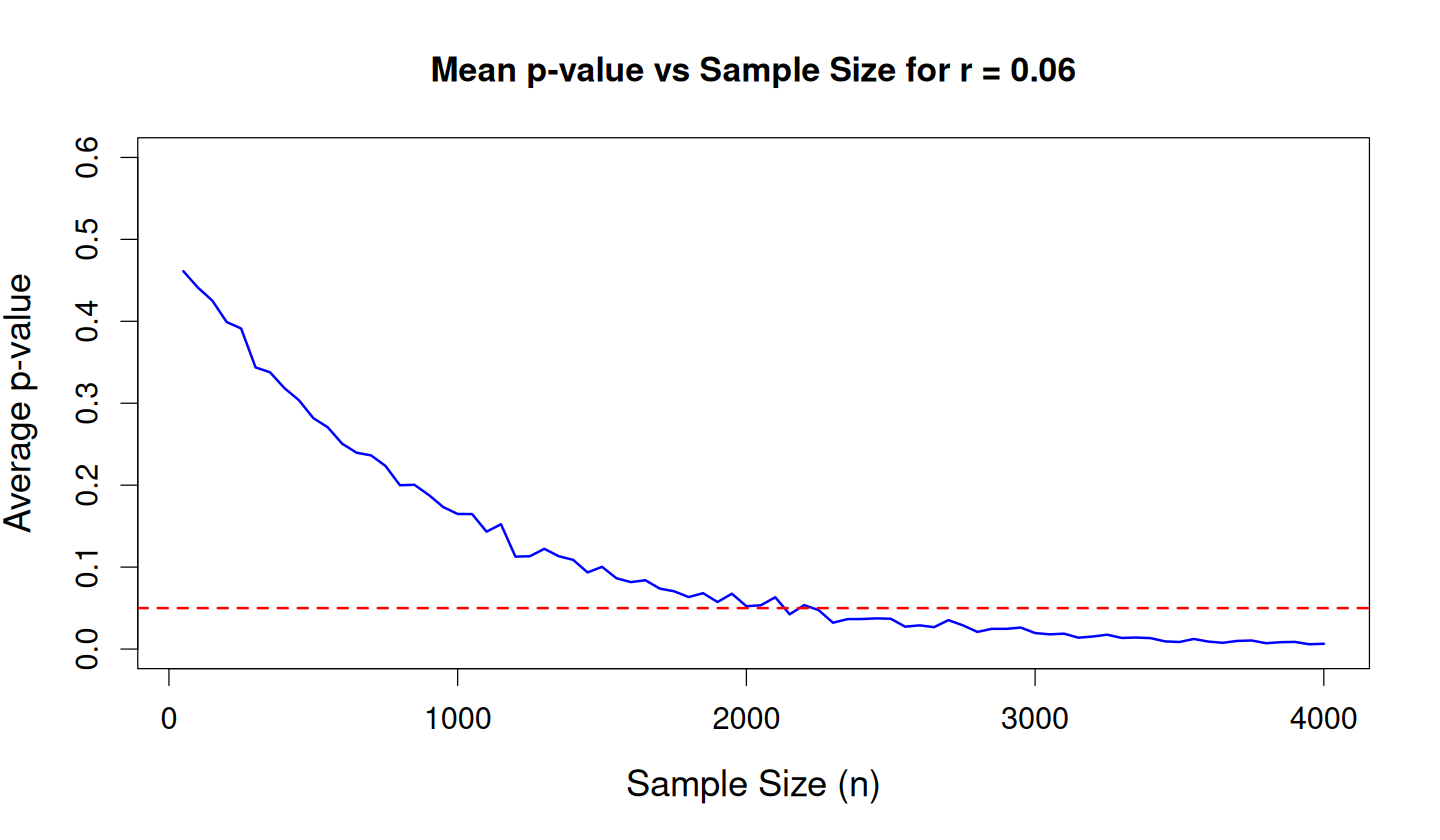

In [4]:
library(MASS)  # for mvrnorm

set.seed(123)

# Parameters
rho   <- 0.06
max_n <- 4000
step  <- 50
reps  <- 500

# Covariance matrix for bivariate normal
Sigma        <- matrix(c(1,rho,rho,1),2,2)
sample_sizes <- seq(step, max_n, by = step)

# Store mean p-values
mean_pvals <- numeric(length(sample_sizes))

for (i in seq_along(sample_sizes)) {
  n <- sample_sizes[i]
  
  pvals <- numeric(reps)
  
  for (r in 1:reps) {
    dat <- mvrnorm(n, mu = c(0, 0), Sigma = Sigma)
    test <- cor.test(dat[, 1], dat[, 2])
    pvals[r] <- test$p.value
  }
  
  mean_pvals[i] <- mean(pvals)
}

par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling

# Plot
plot(sample_sizes, mean_pvals, 
    type="l", lwd=2, col="blue", ylim=c(1e-4,0.6),
     xlab="Sample Size (n)", ylab="Average p-value",
     main="Mean p-value vs Sample Size for r = 0.06")

abline(h=0.05, col="red", lty=2, lwd=2)


Based on this graph, we would need around 2,000 subjects for this correlation to be significant. This might sounds like a lot, but considering how easily accessible big datasets are these days (such as the [UK Biobank](https://www.ukbiobank.ac.uk/), which has $n \approx 500,000$) and the ease of collecting questionnaire data online, $n = 2,000$ is not really that unreasonable. Although you could argue that the necessary sample size alone should indicate a problem, this implies that there is some limit for $n$, above which we can no longer trust $p$-values. So what is this limit? The very fact that there is an implied limit suggests that there is something funamentally problematic with using $p$-values as evidence. 

It is important here to recognise that the $p$-value is *not wrong*. The null hypothesis is that $r = 0$, but we know that this incorrect because $r = 0.06$. So the test is doing excactly what it is supposed to. The issue is that *statistical significance* does not mean *practical significance*. If we know that the null hypothesis is always going to be false (i.e. a correlation is never really going to be *exactly* 0), then all a non-significant $p$-value tells us is that we do not have enough data. In this example, we do not have enough data until we reach $n \approx 2,000$. The problem is, if we already know that logically the null hypothesis is wrong, what is the point of testing it?

To drive this home, consider what a correlation of $r = 0.06$ actually looks like:

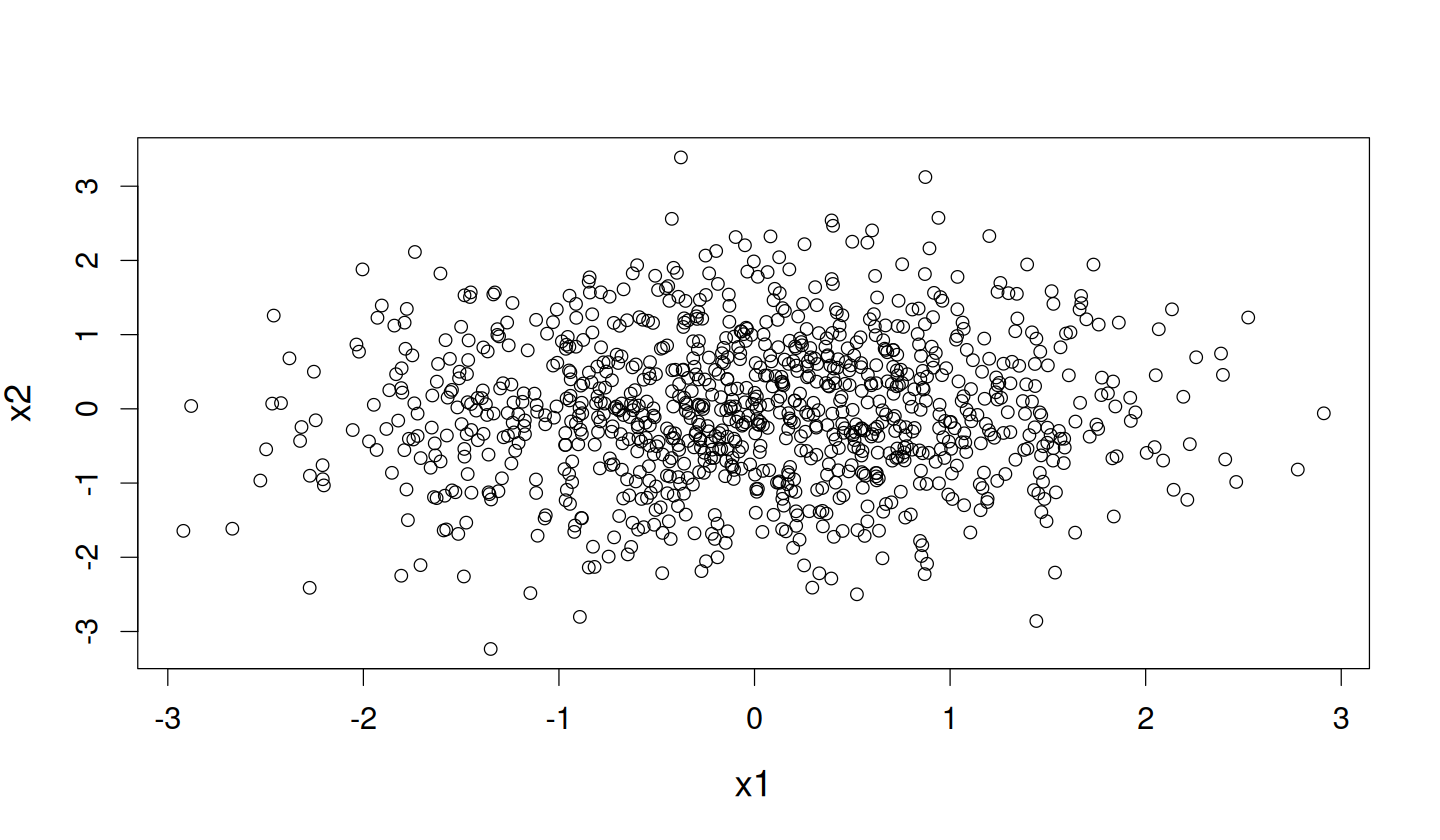

In [27]:
set.seed(666)
corr.data <- mvrnorm(1000, mu=c(0, 0), Sigma=Sigma)
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
plot(corr.data[,1], corr.data[,2], xlab="x1", ylab="x2")

Now imagine that this was presented to you as evidence of some effect, because $p < 0.05$. Would you be convinced? If not, then you are agreeing that the $p$-value is not very useful here. Of course, if you saw $r = 0.06$ reported, you would immediately see that this is a vanishingly small correlation. But clearly you are not using the $p$-value here. Instead, you are admitting that the only useful measure is the *effect size*.

### 3. Conclusions From NHST are Logically Flawed
Another problem with NHST is that the logic almost universally applied when reaching a conclusion from a $p$-value is flawed. To see this, let us first examine a valid application of syllogistic reasoning. Consider the following adapted example from [Cohen (1994)](https://www.sjsu.edu/faculty/gerstman/misc/Cohen1994.pdf):

1. If a person is a Martian then they are not a Member of Parliment.
2. This person is a Member of Parliment.
3. Therefore, this person is not a Martian.

Putting aside any personal paranoia about aliens invading our political system, this is a perfectly valid application of a *modus tollens* argument, as we have seen previously. The conclusion logically and irrefutably follows from the premises. However, we can reach an *invalid* conclusion if any of the premises are faulty. 

1. If a person is British then they are not a Member of Parliment.
2. This person is a Member of Parliment.
3. Therefore, this person is not British. 

This is a perfectly valid argument, but the conclusion is not sensible because the first premise is wrong. *Some* British people are Members of Parliment (650 of them, in fact). We can make the premise more correct by making it probabilistic.

1. If a person is British then it is unlikely that they are a Member of Parliment (given that we are talking 650 people out of a population of over 68 million).
2. This person is a Member of Parliment.
3. Therefore, this person is unlikely to be British.

Unfortunately, the application of logic has now failed and has led to a conclusion that is not sensible. The reason is that applying probability in this way is fraught with issues. Probability quantifies *belief* or *uncertainty*, rather than absolute truth. In fact, probability does not preserve truth in the same way as formal logic. This is precisely because there are *always exceptions*. As such, we can easily reach false conclusions, as shown above. 

The error in assuming that someone is not British because they are a Member of Parliment should hopefully be clear. What is perhaps less immediately obvious is that the same error is made when we do the following:

1. If $H_{0}$ is true, then it is unlikely we would have generated this result (i.e. the $p$-value will be small).
2. This result has been generated (i.e. we have calculated a small $p$-value).
3. Therefore, $H_{0}$ is unlikely to be true.

This is exactly the same logical form as above and yet it *sounds* like a plausible line of reasoning. Nevertheless, in the same vein as the example above, it is logically invalid. Yet this is the conclusion that is implicit in every significant finding reported in the literature. This is what [Cohen (1994)](https://www.sjsu.edu/faculty/gerstman/misc/Cohen1994.pdf) refers to as "the illusion of obtaining improbability". In fact, jumping from 2 to 3 above requires an *inductive leap* because it does not follow logically using deduction. This is the inductive reasoning that lies at the heart of NHST. We are rejecting the possibility that we observed something rare and are instead assuming that $H_{0}$ is false. This is a *leap of faith*[^logic-foot]. Although the mathematics of calculating $p$-values are purely deductive, drawing conclusions about $H_{0}$ based on $p$-value is inescapably induction and logically invalid.

Another way of thinking about this is that a probabilistic conclusion has been reached about $H_{0}$, yet we know that a $p$-value is *not* a probability statement about $H_{0}$. How can we conclude that the null is unlikely when we have not calculated the probability of the null? Instead, a $p$-value is a probability statement about the *data*. In other words, $p = P(\mathcal{D}|H_{0}) \neq P(H_{0}|\mathcal{D})$. Although $P(\mathcal{D}|H_{0})$ and $P(H_{0}|\mathcal{D})$ *sound* very similar, they are not the same quantity. This is discussed in much more detail in the optional drop-down box below. From a pure Frequentist perspective, if we have a significant $p$-value we can conclude that our data are unlikely if the null hypothesis were true. We cannot make any statement about the null hypothesis itself, no matter how much we want to!


```{epigraph}
What's wrong with NHST? Well, among many other things, it does not tell us what we want to know, and we
so much want to know what we want to know that, out of desperation, we nevertheless believe that it does! 

-- Jacob Cohen, *The World Is Round (p < 0.05)* (1994)
```

```{admonition} Why $P(\mathcal{D}|H_{0}) \neq P(H_{0}|\mathcal{D})$
:class: tip, dropdown
It can be helpful in trying to understand why the two statements $P(\mathcal{D}|H_{0})$ and $P(H_{0}|\mathcal{D})$ are *not* the same quantity by studying an example. This is taken from [Cohen (1994)](https://www.sjsu.edu/faculty/gerstman/misc/Cohen1994.pdf) and concerns the results of a new test for Schizophrenia. Based on testing 1,000 random individual from the whole population, we have:

| Result                 | Normal    | Schiz  | Total  |
| :--------------------- | --------- | ------ | -----: |
| Negative test (Normal) | 949       | 1      | 950    |
| Positive test (Schiz)  | 30        | 20     | 50     |
| Total                  | 979       | 21     | 1000   |


To put this into the framework of NHST, let us then assume:

- $H_{0}$ = An individual is "normal"
- $H_{1}$ = An individual has Schizophrenia
- $\mathcal{D}$ = The test result is positive for Schizophrenia

From here, let us see what the $p$-value tells us. Remembering that $p = P(\mathcal{D}|H_{0})$, we are therefore conditioning on $H_{0}$ being true. For the table above, that means we are only looking at the *first column*. Based on this column alone, what is the probability that the result is positive? In this instance, we would calculate $30$ positive results out of a total of $979$, which gives a $p$-value of $30/979 = 0.031$. So we would say that this is a *significant* result. In other words, if it is true that the individual is "normal", the chance of getting a positive test result is small. Given our usual convention, we would therefore *reject the null-hypothesis* that the individual is "normal".

Now let us see what $P(H_{0}|\mathcal{D})$ tells us. This time, we are conditioning on the data we have obtained. Because these data indicate a *positive* test result, this means only looking at the *second row* of the table. Here, we want to know, out of all individuals who recieved a positive test result, how likely is it that they are "normal"? In this instance, we would calculate $30$ "normal" individuals out of a total of $50$ individuals who recieved a positive test, which gives a probability of $30/50 = 0.60$. So far from the null hypothesis being unlikely, it is actually fairly probable that the null hypothesis is *true*, given the data we have.

In this example, the extreme difference comes from the low base-rate of Schizophrenia. If we pluck a random individual off the street, it is fairly unlikely that they have Schizophrenia. Even if they test positive, it still remains unlikely that we found someone with Schizophrenia by chance. However, if we know ahead of time that we have only selected individuals *without* Schizophrenia, the chance of the test coming back positive is very low. This is the difference between conditioning on the data versus conditioning on the null. This illustrates why the two probability statements are not interchangeable, and also illustrates why you cannot say anything about the probability of the null from a $p$-value because the calculation of the $p$-value *presupposes the null is true*.
```

### 4. Despite Appearances, NHST is *Not* Objective
Another issue with NHST is that it presents itself as an objective alternative to "subjective" Bayesianism, yet on closer inspection, this claim falls short. It has been stated already that Fisher's main motivating factor for developing Frequentist methods was that he believed that there was no room for *personal belief* within science. His aim was to create a method that was *objective*, and NHST was the result. Unfortunately, despite Fisher's efforts, two key parts of NHST remain highly subjective:

- The threshold for significance itself is *arbitrary*. Although Fisher did not condone hard thresholds, his heuristic of $p = 0.05$ remains a subjective marker for "significance". There is no argument to be made that can logically or rationally justify why $1/20$ is a meaningful yardstick. This gets worse when moving to the Neyman-Pearson approach and making binary decisions based on an arbitrary $\alpha$-level.
- The results of NHST are highly dependent on the decisions of the data analyst. Choices about the model form, variables, null value, test-statistic and direction of the test are all based on subjective decisions made by the researcher. These choices[^rdf-foot] are a natural part of a data analysis, but will always have a big impact on the $p$-value.

So, far from being the *objective* method that Fisher desired, NHST simply displaces subjectivity into modelling decisions and arbitrary heuristics/thresholds for interpretation. This leads to a method that is unable to be purely objective, but in trying to be objective ends up answering questions we are not interested in. Indeed, the obsessive strive for objectivity backs NHST into a corner, where it is unable to say much that is useful. Somewhat ironically, Fisher's desire for objectivity stemmed from his own *subjective* view of how science ought to be. In criticising Bayesian inference (which he referred to as "inverse probability"), Fisher said: 

```{epigraph}
The theory of inverse probability is founded upon an error, and must be wholly rejected.

-- Ronald Fisher, *Statistical Methods for Research Workers* (1925)
```

The "error" that Fisher is referring to is the use of prior probabilities and the treatment of *parameters* as random variables. So this "error" is a *subjective opinion* based on Fsiher's refusal to treat probability as a *degree of belief*, rather than a long-run frequency. So, Fisher's desire for objectivity is based entirely on his own subjective view of how he thought the world should operate. As an alternative, it has been argued that we need to embrace the fact that some degree of personal belief will *always* be a part of science. As the philosopher's [Howson & Urbach (2006)](https://www.librarysearch.manchester.ac.uk/permalink/44MAN_INST/bofker/alma992975897924201631) put it:

```{epigraph}
There is a subjective element...which offends some, but which, we submit, is wholly realistic. Perfectly sane scientists with access to the same information often do evaluate theories differently...You might take the view that...responsible scientists ought not to let personal, subjective factors influence their beliefs. But then you would have to face the fact that this view is itself a prejudice, because despite an immense intellectual effort, no one has produced a coherent defence of it, let alone a proof. 

-- Howson & Urback, *Scientific Reasoning: The Bayesian Approach* (2006, pg. 262-63)
```

Another way of thinking about this is that *if* there are universal truths of nature, they will emerge *despite* individual subjective opinions. The way Bayesian probability works is that it weights prior beliefs with the actual data to produce a *shifting* of belief. If the data is numerous and disagrees with the prior beliefs, then the data will *force* beliefs to change. As such, even if researchers start with very different opinions about a subject, the data will force them into agreement as it becomes more numerous. This convergence of opinion is a natural part of the Bayesian framework and it is a mistake to ignore it and assume that bias introduced by the priors is an irreconcilable problem. At the end of the day, the data will win and the truth will out.

### 5. NHST is *Not* Popperian Falsificationism
As a final issue, we need to address a common confusion between NHST and Popper's Falsificationism. At the beginning of this lesson, we presented Popper's answer to the problem of induction via his principle of falsification. We also presented Falsificationism alongside Bayesian scientific reasoning as different approaches to addressing induction. Given that we have also implied that Bayesian methods are an alternative to Frequentist methods, it may be natural to think that NHST and Falsificationism are somehow connected. Indeed, given that both methods focus on *refuting* some position (e.g. trying to reject the null), it is a common confusion to think that NHST is some sort of implementation of Popper's philosophy. However, this is not true.

Perhaps the simplest way to demonstrate this is to indicate that Fisher's development of NHST came years *before* Popper published on Falsificationism. Fisher's key ideas around $p$-values appeared in 1925, whereas Popper published his ideas on Falsificationism in 1934 in German, with the English translation not appearing until 1959. Furthermore, Popper himself was highly critical of statistical inference because it is *inescapably* inductive. However, much like there has been an incompatible blurring of Fisher and Nyman-Pesrson, researchers often blend-in an equally incompatible dash of Popper. 

To see why NHST does not work as an implementation of Popper's ideas, consider that Popper's concerns were with falsifying *theories* using deductive logic, not providing probabilistic statements on indirect claims related to a theory (i.e. the null hypothesis). The rejection of the null is not falsification of a scientific theory. A small $p$-value does not logically falsify the null and a large $p$-value does not verify the null. These are probability statements about data, not deductive falsification. Popper wanted results that logically and unambiguously show that a theory *cannot be correct*. 

As an example, consider the theory is that it is raining outside. Our testable prediction is based on seeing whether the ground is wet. If the ground is *not wet*, then my theory has been falsified. This is deductive falsification as a variant of the *modus tollens* argument we saw earlier: 

1. If it is raining, the ground will be wet. My theory is that it is raining.
2. We observe that the ground is *not* wet.
3. Therefore, my theory has been falsified and we conclude that it is *not* raining.

Compare this to the NHST approach. Here we use the null hypothesis that it is *not raining*: 

$$
\mathcal{H}_{0} : \text{It is not raining}.
$$

We observe the ground and see that it *is* wet. 

$$
\mathcal{D} : \text{The ground is wet}
$$

We then compute our $p$-value as the probability of observing wet ground when it is not raining

$$
p = P\left(\mathcal{D}|\mathcal{H}_{0}\right) = P\left(\text{The ground is wet}|\text{It is not raining}\right).
$$

For the sake of argument, say we get $p = 0.01$ and we reject the null. However, we have *not* deductively falsified the null here. This is a probability statement about the compatibility of the data. However, there could be other reasons why the ground is wet. Maybe the neighbours have their sprinklers switched on? Maybe somebody spilled something? So even if wet ground is *unlikely* under the null, rejecting the idea that it is "not raining" does not logically confirm that it is "raining". We might reject the null, but we have not falsified it because the conclusion is *probabilistic*. Popper's system would require us to use deductive logic to absolutely refute that it is not raining and thus confirm that it is raining. NHST does not allow us to do this and so *cannot* be an implementation of Falsificationism.

## Should We Abandon NHST?
We have now reached the bigger question of this lesson. NHST is ubiquitous, in whatever form it takes, as the universal method used for statistical inference. This is especially true in a field like Experimental Psychology, where our reliance on statistics is so high, and the field itself developed almost hand-in-hand with modern statistics. Areas such as Biology, Chemistry and Physics managed to progress for hundreds of years without $p$-values, yet the history of Psychology is largely an exercise in how many $p$-values smaller than 0.05 we can find. Hopefully, given our discussions in this lesson, this is quite a concerning state of affairs. Such concerns are nothing new, as criticisms of NHST have existed since Fisher first introduced the framework. However, concern has more recently been renewed thanks to a [crisis of confidence](https://en.wikipedia.org/wiki/Replication_crisis) in the abilility of many scientific findings to replicate. So, should we be moving towards abandoning NHST? Perhaps the better question is, given how entrenched NHST is in modern science, *can* we abandon NHST? Is it even possible to turn this ship around? Does any of this even matter if induction is logically invalid? These are big questions and will be the focus of this week's synchoronous session.

`````{topic} What do you now know?
In this section, we have explored the controversy behind using NHST as our main method for statistical inference. After reading this section, you should have a good sense of:

- The idea that NHST does not answer the questions that most researchers are interested in, due to restrictions in the way that Frequentists interpret probability.
- The idea that the null hypothesis is often implausible, even when choosing a value other than 0. The consequence is that the null is *almost never true*, meaning that we just need enough to data to calculate a significant $p$-value.
- The idea that NHST requires an inductive leap to go from a probability statement about the data under the null, to assuming that the null is therefore unlikely. This is logically invalid.
- The idea that NHST is not objective because thresholds are arbitrary and decisions during the data modelling will influence the $p$-values.
- The key clarification that NHST is *not* an implementation of Popperian Falsificationism, despite some cursory similarities.
`````

### NHST vs Frequentism in General
It is important that we make a clear distinction between NHST and Frequentist statistics, becasue we could abandon NHST yet retain a Frequentist approach. If we agree with Fisher's perspective on avoiding subjectivity in Bayesianism and treating parameters and hypotheses as *constants of the universe*, then we can still use Frequentist methods to get maximum-likelihood estimates and derive their sampling distributions. These estimates will often agree with their Bayesian alternatives and thus there is less controversy here. The question is always about *how* we then choose to interpret those estimates and, crucially, how we engage in inductive reasoning given those estimates? The issue, of course, is that there no single answer here because inductive reasoning cannot be justified on logical grounds and thus can only be justified *pragmatically*. So we have no method we can employ to justify any method of induction. All we can do is try to find the one that appears to cause the least problems. Bayesians would argue that their method is more theoretically consistent and can provide the probabilities that researchers actually want. Frequentists would say that their method is less subjective and can find answers based on a version of probability that is grounded in physical truth, rather than personal beliefs. Neither is right and neither is wrong, hence decisions here must come from *you* and *your own perspective* on this current state of affairs.
### NHST and the Replication Crisis
... So, is NHST to blame? 
### The ASA Statement on $p$-values
This statement is based on 6 key principles:

1. P-values can indicate how incompatible the data are with a specified statistical model.
2. P-values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone.
3. Scientific conclusions and business or policy decisions should not be based only on whether a p-value passes a specific threshold.
4. Proper inference requires full reporting and transparency
5. A p-value, or statistical significance, does not measure the size of an effect or the importance of a result.
6. By itself, a p-value does not provide a good measure of evidence regarding a model or hypothesis.

Taken together, these principles highlight how basing much of our scientific knowledge on $p$-values alone is deeply flawed and misleading. Yet, this is precisely what the field of experimental psychology has done for years.

So, based on all this, should we be using $p$-values and, more generally, the framework of NHST at all?
### The New Statistics
Because this unit, and this course in general, is very much about the reality of modern Experimental Psychology, we will not be mandating a sudden switch to Bayesian methods[^bayesfoot]. Instead, our aim is to present the methods that are used, as well as their problems, so that you can make informed decisions about which to use. The vast majority of these methods, as implemented in `R`, are Frequentist in nature. As such, we need to look for a way forward within this framework. Even though NHST is still very much used in the field, knowing the problems with $p$-values should caution you against their use as the *primary* piece of evidence for reaching conclusions from your models.

So what can be done? 

[^fiducialfoot]: Fisher *knew* that frequentist probabilities about the data were unsatisfying. He also knew that researchers wanted was a quantity more like $P(\beta_{1}|\mathcal{D})$. To do this *without* Bayesian methods, he tried to invent a new type of probability called [*fiducial* probability](https://en.wikipedia.org/wiki/Fiducial_inference) to get statements about parameters that were compatible with Frequentism. This was generally considered a failure, but does highlight that even Fisher knew that Frequentist methods were answering the wrong question.

[^mlfoot]: This is the reason why maximum-likelihood is based on maximising the probability of the *data*, rather than the probability of the *parameters*.

[^rdf-foot]: The wealth of choices available during a data analysis are sometimes known as *researcher degrees of freedom*. The more choices available, the more possible outcomes of the analysis there are and the more a set of results depends upon the choices that were made. This *garden of forking paths* is actually quite a big problem in terms of being able to replicate existing results with new data.

[^bayesfoot]: Even if at least one of the authors of this lesson thinks this *is* what we should be doing!

[^logicfoot]: This is primarily an issue with Neyman-Pearson logic because their aim was to make sure that our mistakes are controlled. As such, they are happy for us to make this statement, even though it may be wrong, so long as we are not wrong too often. However, we can never know if this particular occassion is the one where we *are* wrong. So again, we make the leap of faith that we are not wrong this time. Fisher never made such a mistake because he has no interest in rejecting hypotheses and was always very careful to only talk about "compatibility with the null".